In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Decision Boundary: how to find the boundary fit data 

- z = wx+ b
- z = ...

In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures  
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [9]:

def plot_decision_boundary(clf, X, y, ax, title="", proba=False, grid_steps=300):
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_steps),
                         np.linspace(y_min, y_max, grid_steps))
    grid = np.c_[xx.ravel(), yy.ravel()]
    # compute continuous score z:
    if (not proba) and hasattr(clf, "decision_function"):
        zz = clf.decision_function(grid)
    elif hasattr(clf, "predict_proba"):
        zz = clf.predict_proba(grid)[:,1] - 0.5
    else:
        zz = clf.predict(grid)
    zz = zz.reshape(xx.shape)
    # contour at zero => decision boundary
    ax.contour(xx, yy, zz, levels=[0], linewidths=2)
    ax.contourf(xx, yy, zz, levels=20, alpha=0.1)
    ax.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolors='k', s=30)
    ax.set_title(title)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks([]); ax.set_yticks([])

def run_and_plot(X, y, dataset_name="Dataset"):
    # train/test split (we plot using training points)
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)

    # Classifiers to compare
    clfs = [
        ("Logistic (linear)", make_pipeline(StandardScaler(), LogisticRegression(C=1.0, solver='lbfgs'))),
        ("Logistic (poly degree=2)", make_pipeline(StandardScaler(),
                                                  PolynomialFeatures(degree=2, include_bias=False),
                                                  LogisticRegression(C=1.0, solver='lbfgs', max_iter=500))),
        ("SVM (RBF)", make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True, gamma='scale', C=1.0))),
        ("RandomForest", RandomForestClassifier(n_estimators=200, max_depth=5, random_state=1)),
        ("MLP (small NN)", make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(50, ), max_iter=1000, random_state=1)))
    ]

    # Fit classifiers
    for name, clf in clfs:
        clf.fit(X_train, y_train)
        # print simple scores
        print(f"{dataset_name} - {name}: train acc = {clf.score(X_train, y_train):.3f}, test acc = {clf.score(X_test, y_test):.3f}")

    # Plot
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    for ax, (name, clf) in zip(axes, clfs):
        plot_decision_boundary(clf, X_train, y_train, ax, title=name)
    # leave one subplot for special engineered example if dataset is circles
    if dataset_name == "Circles (with feature engineering)":
        # prepare logistic on engineered feature r^2
        # Create X_ext = [x1, x2, r2] then standardize before logistic
        r2 = (X_train[:,0]**2 + X_train[:,1]**2).reshape(-1,1)
        X_ext = np.hstack([X_train, r2])
        # We need a custom plotting function that uses r^2 in grid too
        scaler = StandardScaler()            
        X_ext_scaled = scaler.fit_transform(X_ext)

        clf_lin_r = LogisticRegression(C=1.0, solver='lbfgs')
        clf_lin_r.fit(X_ext_scaled, y_train)


        # custom grid predicting using r^2
        ax = axes[-1]
        x_min, x_max = X_train[:,0].min() - 0.5, X_train[:,0].max() + 0.5
        y_min, y_max = X_train[:,1].min() - 0.5, X_train[:,1].max() + 0.5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                             np.linspace(y_min, y_max, 300))
        grid = np.c_[xx.ravel(), yy.ravel()]
        r2_grid = (grid[:,0]**2 + grid[:,1]**2).reshape(-1,1)
        grid_ext = np.hstack([grid, r2_grid])
        zz = clf_lin_r.predict_proba(scaler.transform(grid_ext))[:,1] - 0.5
        zz = zz.reshape(xx.shape)
        ax.contour(xx, yy, zz, levels=[0], linewidths=2)
        ax.contourf(xx, yy, zz, levels=20, alpha=0.1)
        ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='bwr', edgecolors='k', s=30)
        ax.set_title("Logistic with r^2 feature (x1^2+x2^2)")
        ax.set_xticks([]); ax.set_yticks([])

    else:
        # hide last empty subplot
        axes[-1].axis('off')

    plt.suptitle(f"Decision boundaries on {dataset_name}", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


Moons - Logistic (linear): train acc = 0.879, test acc = 0.858
Moons - Logistic (poly degree=2): train acc = 0.879, test acc = 0.858
Moons - SVM (RBF): train acc = 0.939, test acc = 0.933
Moons - RandomForest: train acc = 0.982, test acc = 0.917
Moons - MLP (small NN): train acc = 0.968, test acc = 0.942


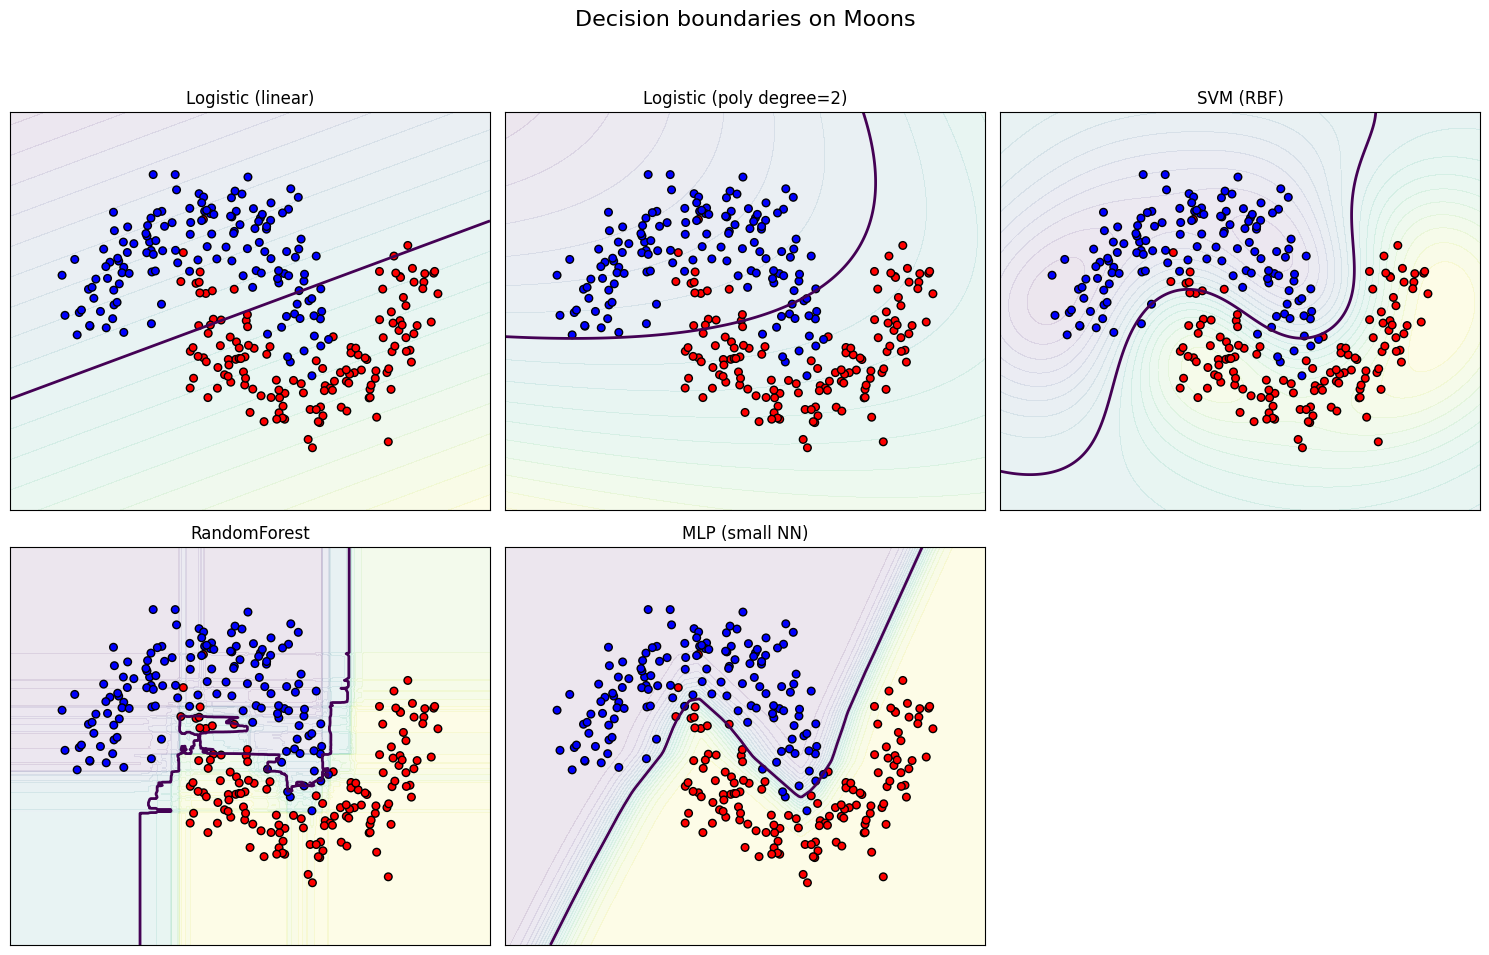

Circles (with feature engineering) - Logistic (linear): train acc = 0.504, test acc = 0.467
Circles (with feature engineering) - Logistic (poly degree=2): train acc = 1.000, test acc = 1.000
Circles (with feature engineering) - SVM (RBF): train acc = 1.000, test acc = 1.000
Circles (with feature engineering) - RandomForest: train acc = 1.000, test acc = 0.983
Circles (with feature engineering) - MLP (small NN): train acc = 1.000, test acc = 1.000


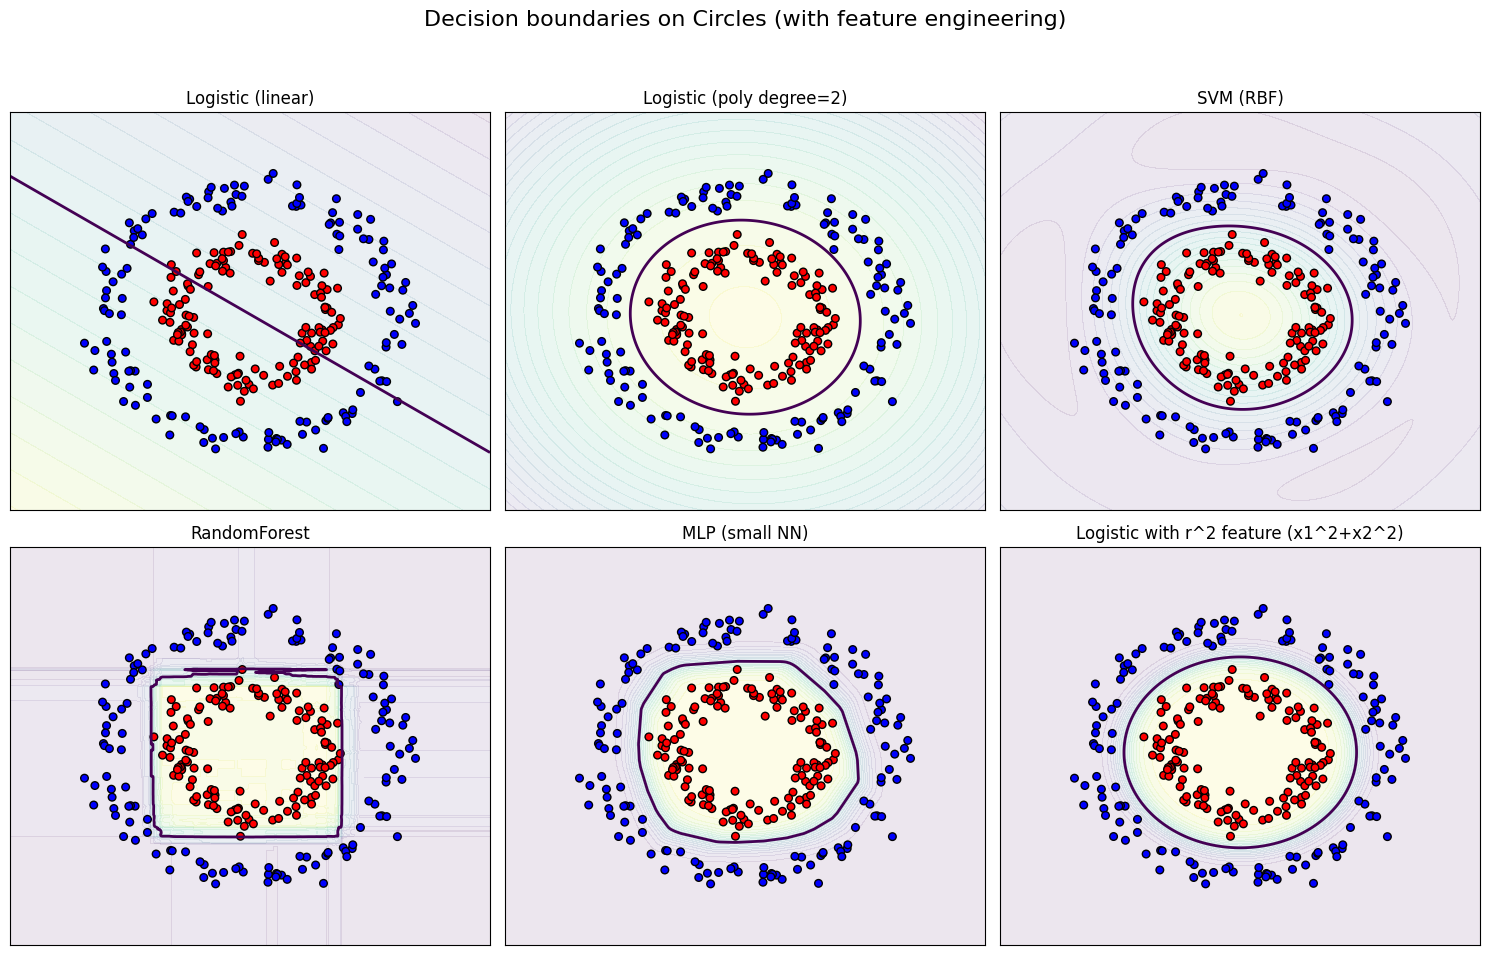

In [7]:

random_state = 0
# 1) Moons (nonlinear, two crescent shapes)
X_moons, y_moons = make_moons(n_samples=400, noise=0.2, random_state=random_state)
run_and_plot(X_moons, y_moons, dataset_name="Moons")

# 2) Circles (concentric) - classical case where radial feature helps
X_circles, y_circles = make_circles(n_samples=400, noise=0.08, factor=0.5, random_state=random_state)
run_and_plot(X_circles, y_circles, dataset_name="Circles (with feature engineering)")


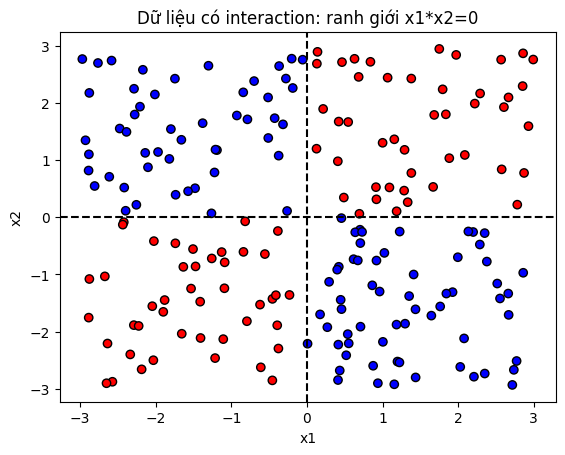

In [11]:

# Tạo dữ liệu
np.random.seed(0)
x1 = np.random.uniform(-3, 3, 200)
x2 = np.random.uniform(-3, 3, 200)

# Tạo nhãn theo quy tắc có interaction: y=1 nếu x1*x2 > 0 (cùng dấu), ngược lại 0
y = (x1 * x2 > 0).astype(int)

plt.scatter(x1, x2, c=y, cmap='bwr', edgecolor='k')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Dữ liệu có interaction: ranh giới x1*x2=0')
plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')
plt.show()


/tmp/ipykernel_370770/3722046129.py:5: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data = np.random.multivariate_normal(mean, cov, size=300)
/tmp/ipykernel_370770/3722046129.py:14: RuntimeWarning: invalid value encountered in sqrt
  ellipse = Ellipse(xy=mean, width=2*np.sqrt(eigvals[0]), height=2*np.sqrt(eigvals[1]),


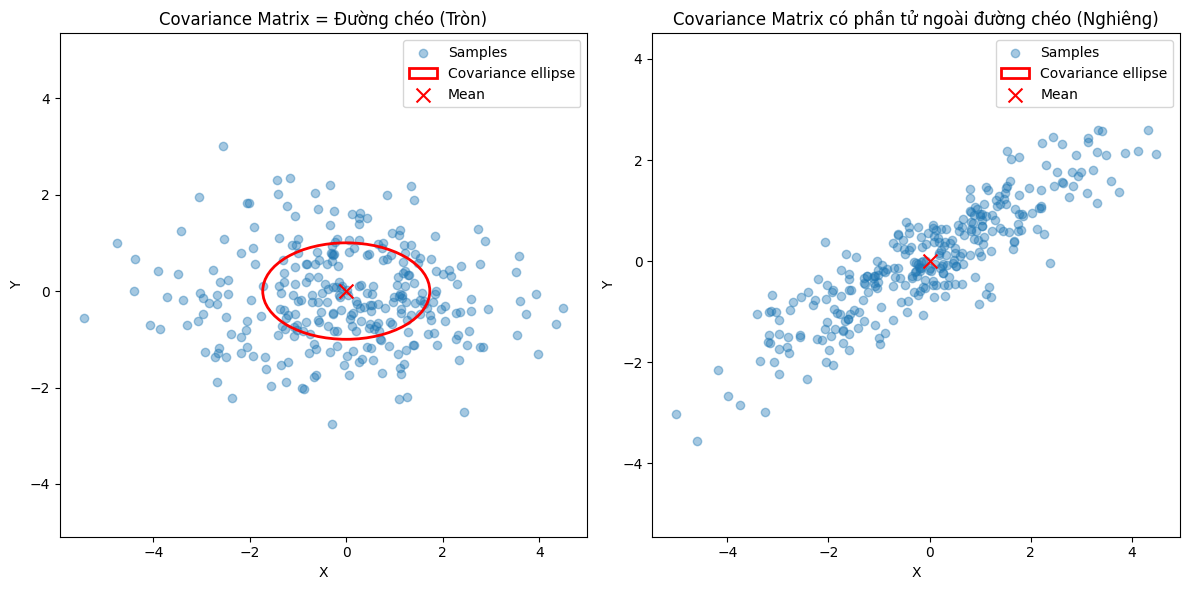

In [10]:
from matplotlib.patches import Ellipse

def plot_covariance(mean, cov, ax, title):
    # Vẽ các điểm dữ liệu ngẫu nhiên từ phân phối chuẩn đa biến
    data = np.random.multivariate_normal(mean, cov, size=300)
    ax.scatter(data[:, 0], data[:, 1], alpha=0.4, label="Samples")

    # Tính trị riêng & vector riêng để vẽ ellipse
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))

    ellipse = Ellipse(xy=mean, width=2*np.sqrt(eigvals[0]), height=2*np.sqrt(eigvals[1]),
                      angle=angle, edgecolor='red', fc='None', lw=2, label='Covariance ellipse')
    ax.add_patch(ellipse)

    ax.scatter(mean[0], mean[1], c='red', marker='x', s=100, label="Mean")
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.axis('equal')
    ax.legend()

# 1️⃣ Covariance ma trận đường chéo (độc lập)
mean = np.array([0, 0])
cov_diagonal = np.array([[3, 0], [0, 1]])

# 2️⃣ Covariance có phần tử ngoài đường chéo ≠ 0 (tương quan)
cov_offdiag = np.array([[3, 2], [2, 1]])

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

plot_covariance(mean, cov_diagonal, axes[0], "Covariance Matrix = Đường chéo (Tròn)")
plot_covariance(mean, cov_offdiag, axes[1], "Covariance Matrix có phần tử ngoài đường chéo (Nghiêng)")

plt.tight_layout()
plt.show()


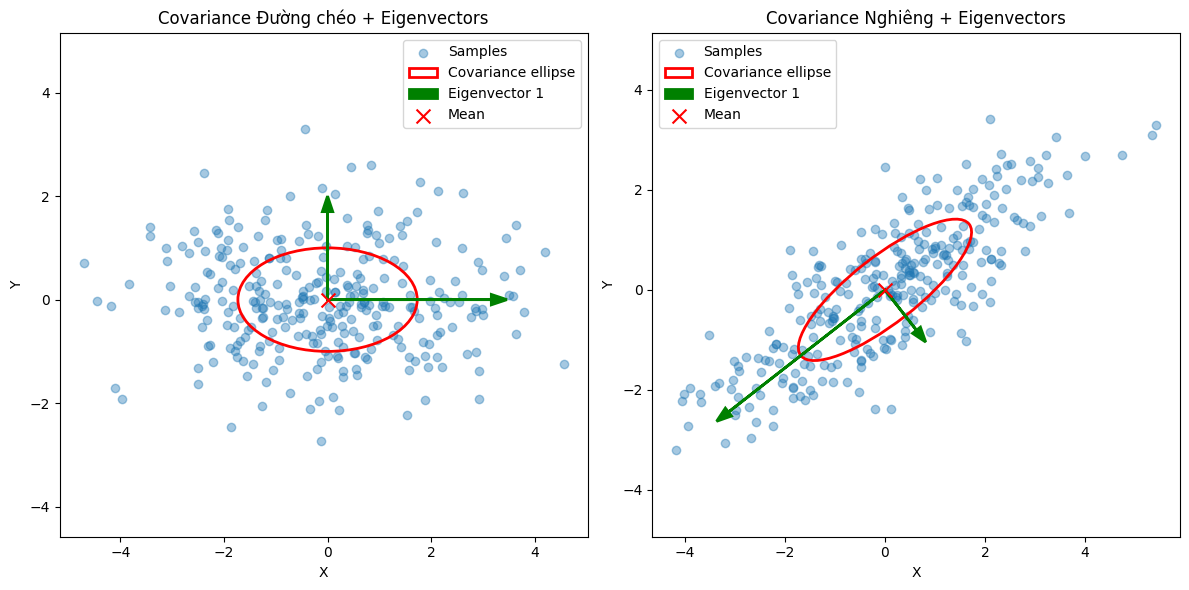

In [5]:
def plot_covariance_with_eig(mean, cov, ax, title):
    # Vẽ các điểm dữ liệu ngẫu nhiên
    data = np.random.multivariate_normal(mean, cov, size=300)
    ax.scatter(data[:, 0], data[:, 1], alpha=0.4, label="Samples")

    # Tính trị riêng & vector riêng
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))

    # Vẽ ellipse
    ellipse = Ellipse(xy=mean, width=2*np.sqrt(eigvals[0]), height=2*np.sqrt(eigvals[1]),
                      angle=angle, edgecolor='red', fc='None', lw=2, label='Covariance ellipse')
    ax.add_patch(ellipse)

    # Vẽ eigenvectors
    for i in range(len(eigvals)):
        vec = eigvecs[:, i] * np.sqrt(eigvals[i]) * 2
        ax.arrow(mean[0], mean[1], vec[0], vec[1], head_width=0.2, head_length=0.3,
                 fc='green', ec='green', lw=2, length_includes_head=True,
                 label=f"Eigenvector {i+1}" if i == 0 else None)

    ax.scatter(mean[0], mean[1], c='red', marker='x', s=100, label="Mean")
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.axis('equal')
    ax.legend()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

plot_covariance_with_eig(mean, cov_diagonal, axes[0], "Covariance Đường chéo + Eigenvectors")
plot_covariance_with_eig(mean, cov_offdiag, axes[1], "Covariance Nghiêng + Eigenvectors")

plt.tight_layout()
plt.show()


[[-2.46237314 -1.78049608]
 [-1.7192901  -0.33896971]
 [ 0.64885363  0.55673846]
 [ 0.70742479 -0.88314834]
 [ 0.07780873 -1.21858064]
 [ 2.00976237  1.93320533]
 [-1.90961601 -1.22222123]
 [-1.74634222 -1.78168921]
 [ 0.2566196   1.65791085]
 [ 1.0007589   0.25855761]]


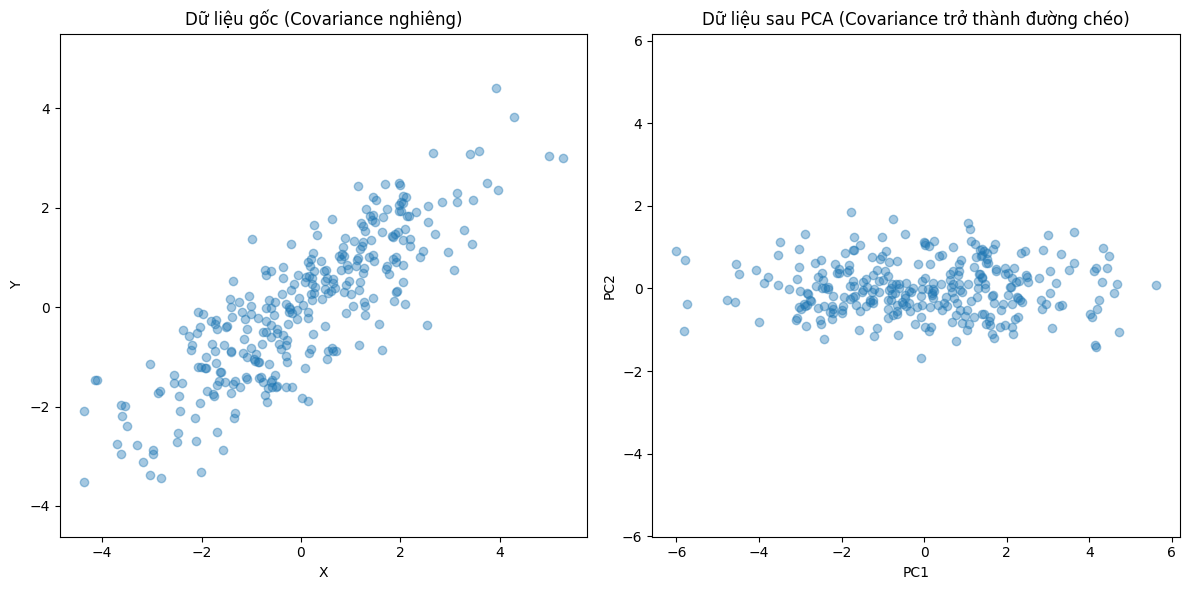

In [ ]:

# 1️⃣ Sinh dữ liệu tương quan
mean = np.array([0, 0])
cov = np.array([[3, 2], [2, 2]])  # covariance nghiêng
data = np.random.multivariate_normal(mean, cov, size=300)

# 2️⃣ Tính ma trận hiệp phương sai và eigen decomposition
cov_matrix = np.cov(data.T)
eigvals, eigvecs = np.linalg.eigh(cov_matrix)
order = eigvals.argsort()[::-1]
eigvals, eigvecs = eigvals[order], eigvecs[:, order]

# 3️⃣ Thực hiện PCA (xoay dữ liệu theo eigenvectors)
data_pca = data @ eigvecs

# 4️⃣ Vẽ dữ liệu trước & sau PCA
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Trước PCA
axes[0].scatter(data[:, 0], data[:, 1], alpha=0.4)
axes[0].set_title("Dữ liệu gốc (Covariance nghiêng)")
axes[0].axis('equal')
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")

# Sau PCA
axes[1].scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.4)
axes[1].set_title("Dữ liệu sau PCA (Covariance trở thành đường chéo)")
axes[1].axis('equal')
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

plt.tight_layout()
plt.show()


In [3]:
a = np.array([2, 2, 2])
b = np.array([1, 2, 3])

c = np.array(a * b)
print(c)

[2 4 6]


# Run from another file

In [2]:
# Import trực tiếp bằng exec():
file_path = "./testing.py"
exec(open(file_path).read())

Testing


In [ ]:
# Run as a module: 
import sys
# Add dataset's path to sys.path to import
sys.path.append("./testing")


Testing


In [4]:
# Run by '!python'
!python ./testing.py

Testing


## **The end**

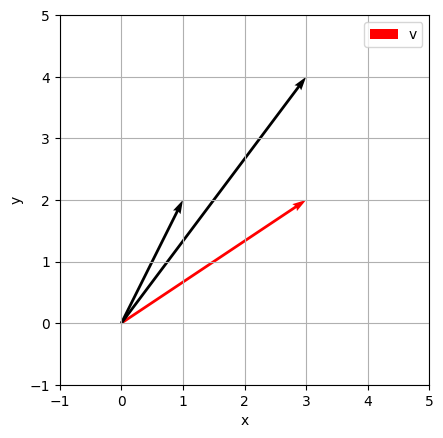

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Vector 1D
v = np.array([3, 2])

# Ma trận 2D
A = np.array([[1, 3],
              [2, 4]])

fig, ax = plt.subplots()

# Vẽ vector 1D
ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='r', label='v')

# Vẽ các cột của ma trận 2D
for i in range(A.shape[1]):
    ax.quiver(0, 0, A[0, i], A[1, i], angles='xy', scale_units='xy', scale=1)

# Tùy chỉnh hệ trục
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.grid()
plt.legend()
plt.show()


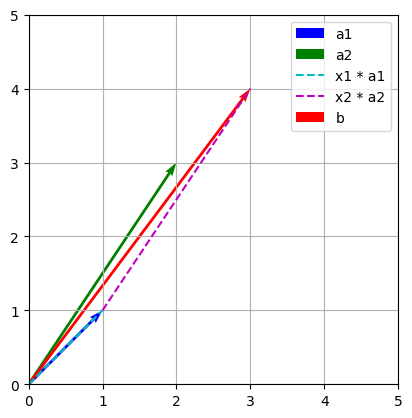

Nghiệm x: [1. 1.]


In [10]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[1, 2],
              [1, 3]])
b = np.array([3, 4])

x = np.linalg.solve(A, b)
a1, a2 = A[:, 0], A[:, 1]
v1 = x[0] * a1
v2 = x[1] * a2

fig, ax = plt.subplots()
origin = np.zeros(2)

# Vẽ cơ sở
ax.quiver(*origin, *a1, angles='xy', scale_units='xy', scale=1, color='b', label='a1')
ax.quiver(*origin, *a2, angles='xy', scale_units='xy', scale=1, color='g', label='a2')

# Vẽ thành phần bằng đường đứt
ax.plot([origin[0], v1[0]], [origin[1], v1[1]], 'c--', label='x1 * a1')
ax.plot([v1[0], v1[0]+v2[0]], [v1[1], v1[1]+v2[1]], 'm--', label='x2 * a2')

# Vẽ vector kết quả b
ax.quiver(*origin, *b, angles='xy', scale_units='xy', scale=1, color='r', label='b')

ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_aspect('equal')
ax.grid()
plt.legend()
plt.show()

print("Nghiệm x:", x)


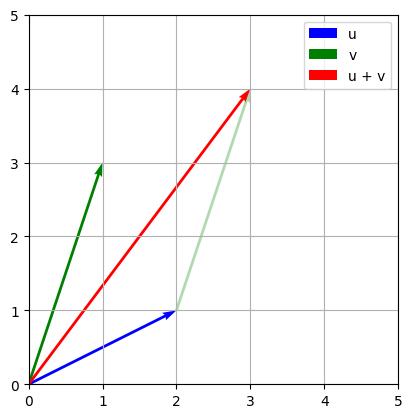

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Hai vector
u = np.array([2, 1])
v = np.array([1, 3])
w = u + v  # Tổng

fig, ax = plt.subplots()
origin = np.zeros(2)

# Vẽ u, v từ gốc
ax.quiver(*origin, *u, angles='xy', scale_units='xy', scale=1, color='b', label='u')
ax.quiver(*origin, *v, angles='xy', scale_units='xy', scale=1, color='g', label='v')

# Vẽ v bắt đầu từ đầu của u (tip-to-tail)
ax.quiver(*u, *v, angles='xy', scale_units='xy', scale=1, color='g', alpha=0.3)

# Vẽ tổng w
ax.quiver(*origin, *w, angles='xy', scale_units='xy', scale=1, color='r', label='u + v')

# Tùy chỉnh hệ trục
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_aspect('equal')
ax.grid()
plt.legend()
plt.show()


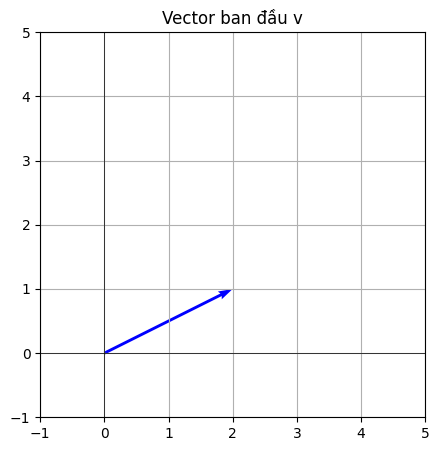

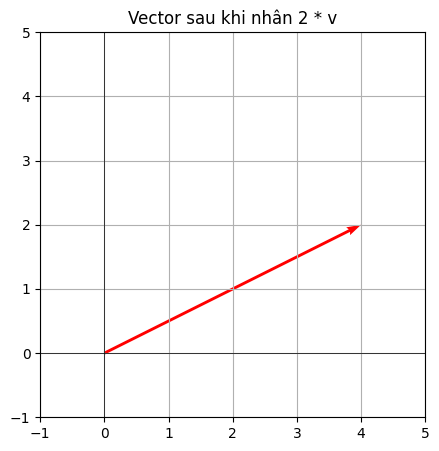

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Vector ban đầu
v = np.array([2, 1])

# Vector sau khi nhân với số x
x = 2
v_scaled = x * v

# --- Biểu diễn vector ban đầu ---
plt.figure(figsize=(5, 5))
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='blue')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title("Vector ban đầu v")
plt.grid(True)
plt.gca().set_aspect('equal')
plt.show()

# --- Biểu diễn vector sau khi nhân ---
plt.figure(figsize=(5, 5))
plt.quiver(0, 0, v_scaled[0], v_scaled[1], angles='xy', scale_units='xy', scale=1, color='red')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title(f"Vector sau khi nhân {x} * v")
plt.grid(True)
plt.gca().set_aspect('equal')
plt.show()


In [15]:
A = [[1, 2],
     [1, 1]]
b = [4, 3]

x = np.linalg.inv(A) @ b

print(x)

[2. 1.]


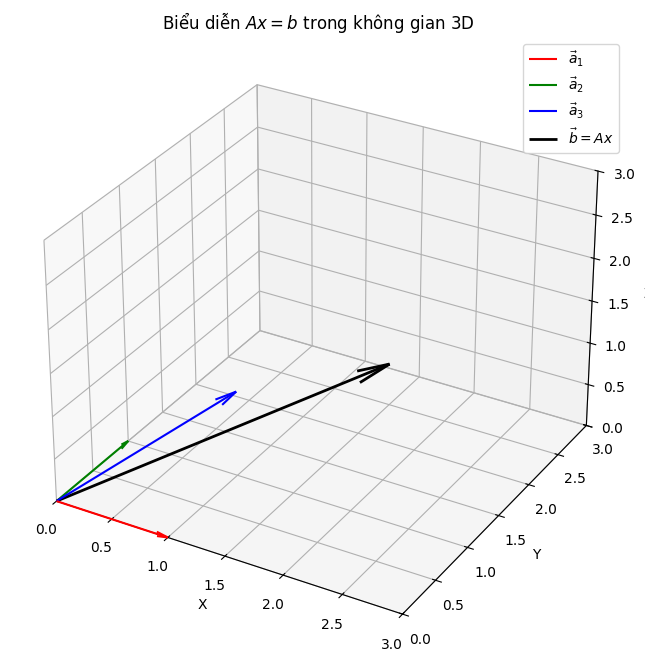

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ma trận A (3x3)
A = np.array([[1, 0, 1],
              [0, 1, 1],
              [0, 0, 1]])

# Vector hệ số x
x = np.array([1, 2, 0.5])

# Tính b = A x
b = A @ x

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Vẽ 3 vector cột của A
origin = np.zeros(3)
colors = ['r', 'g', 'b']
labels = [r'$\vec{a}_1$', r'$\vec{a}_2$', r'$\vec{a}_3$']

for i in range(3):
    ax.quiver(*origin, *A[:, i], color=colors[i], label=labels[i], arrow_length_ratio=0.1)

# Vẽ vector b
ax.quiver(*origin, *b, color='black', label=r'$\vec{b} = A x$', arrow_length_ratio=0.1, linewidth=2)

# Cài đặt trục
ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 3])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(r'Biểu diễn $A x = b$ trong không gian 3D')
ax.legend()

plt.show()


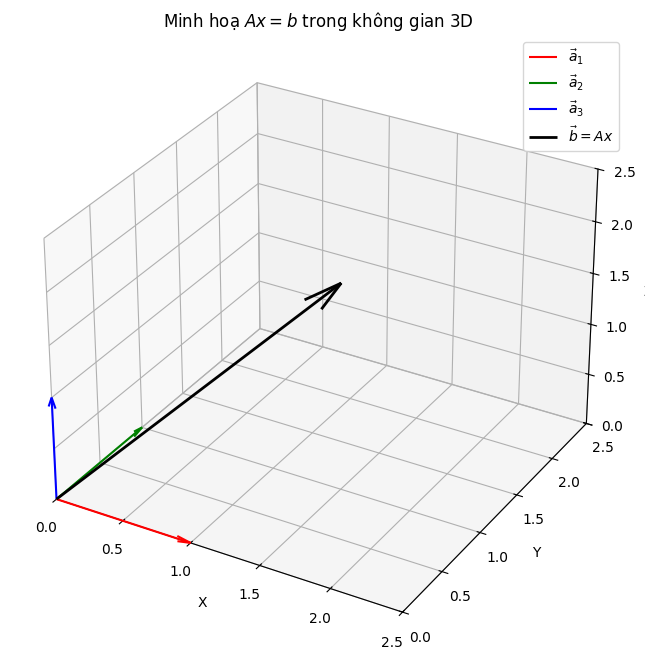

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Ma trận A (3x3) - các cột là 3 vector không đồng phẳng
A = np.eye(3)  # [[1,0,0],[0,1,0],[0,0,1]]

# Vector hệ số x
x = np.array([1.5, 1, 2])

# Tính b = A x
b = A @ x

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

origin = np.zeros(3)
colors = ['r', 'g', 'b']
labels = [r'$\vec{a}_1$', r'$\vec{a}_2$', r'$\vec{a}_3$']

# Vẽ 3 vector cột
for i in range(3):
    ax.quiver(*origin, *A[:, i], color=colors[i], label=labels[i], arrow_length_ratio=0.1)

# Vẽ vector b
ax.quiver(*origin, *b, color='black', label=r'$\vec{b}=A x$', arrow_length_ratio=0.1, linewidth=2)

# Cài đặt trục
ax.set_xlim([0, 2.5])
ax.set_ylim([0, 2.5])
ax.set_zlim([0, 2.5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(r'Minh hoạ $A x = b$ trong không gian 3D')
ax.legend()

plt.show()


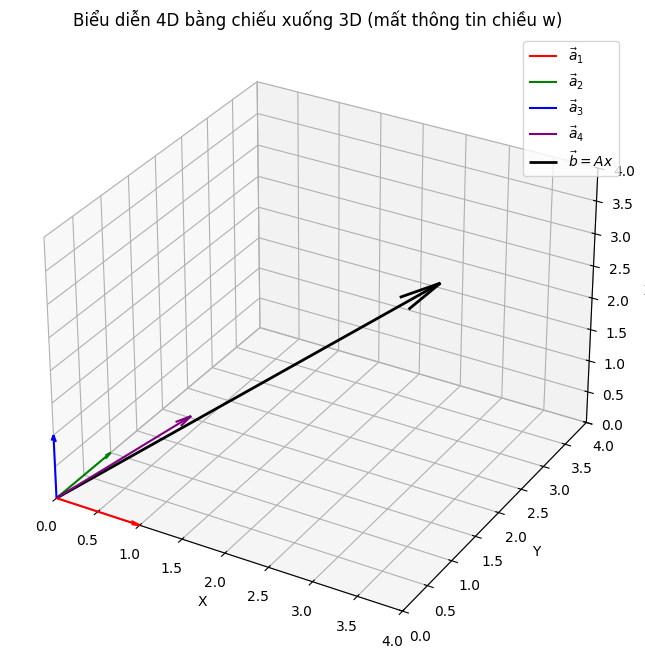

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 4 vector cột trong không gian 4D
A = np.array([[1, 0, 0, 1],
              [0, 1, 0, 1],
              [0, 0, 1, 1],
              [0, 0, 0, 1]])

x = np.array([1, 2, 0.5, 1.5])
b = A @ x

# Lấy 3 thành phần đầu để vẽ trong 3D
A_proj = A[:3, :]
b_proj = b[:3]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

origin = np.zeros(3)
colors = ['r', 'g', 'b', 'purple']
labels = [r'$\vec{a}_1$', r'$\vec{a}_2$', r'$\vec{a}_3$', r'$\vec{a}_4$']

for i in range(4):
    ax.quiver(*origin, *A_proj[:, i], color=colors[i], label=labels[i], arrow_length_ratio=0.1)

ax.quiver(*origin, *b_proj, color='black', label=r'$\vec{b}=A x$', arrow_length_ratio=0.1, linewidth=2)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([0, 4])
ax.set_ylim([0, 4])
ax.set_zlim([0, 4])
ax.set_title("Biểu diễn 4D bằng chiếu xuống 3D (mất thông tin chiều w)")
ax.legend()

plt.show()
